<a href="https://colab.research.google.com/github/jncln/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [182]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [183]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [185]:
print("Data Preview:")
print(df.head())

Data Preview:
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     

In [186]:
df.drop(columns=["show_id", "cast", "description"], inplace=True)


In [187]:
df.dropna(inplace=True)
print(len(df))

5189


In [189]:
vectorizer = TfidfVectorizer(stop_words='english')

genre_matrix = vectorizer.fit_transform(df['listed_in'])

cluster_range = range(1, 15)
inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genre_matrix)
    inertia.append(kmeans.inertia_)

vectorizer = TfidfVectorizer(stop_words='english')
genre_matrix = vectorizer.fit_transform(df['listed_in'])

kmeans = KMeans(n_clusters=6, random_state=42)
df['genre_cluster'] = kmeans.fit_predict(genre_matrix)

1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [190]:
scaler = StandardScaler()
scaled_ds = scaler.fit_transform(genre_matrix.toarray())

In [191]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,5189.0,-7.202649e-16,1.839523,-1.615489,-1.186164,-0.363450,0.415001,11.990160
col2,5189.0,7.038330e-16,1.791251,-5.869734,-0.025781,0.030439,0.141289,17.414528
col3,5189.0,2.015646e-15,1.601066,-8.557896,-1.116635,-0.449190,0.992675,4.772372


In [192]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC2_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC2_explainedvariance)

Explained variance of PC1 0.07689076745643558
Explained variance of PC2 0.07290823073652418
Explained variance of PC3 0.058248109634571166


2. Create a scree plot for each principal component

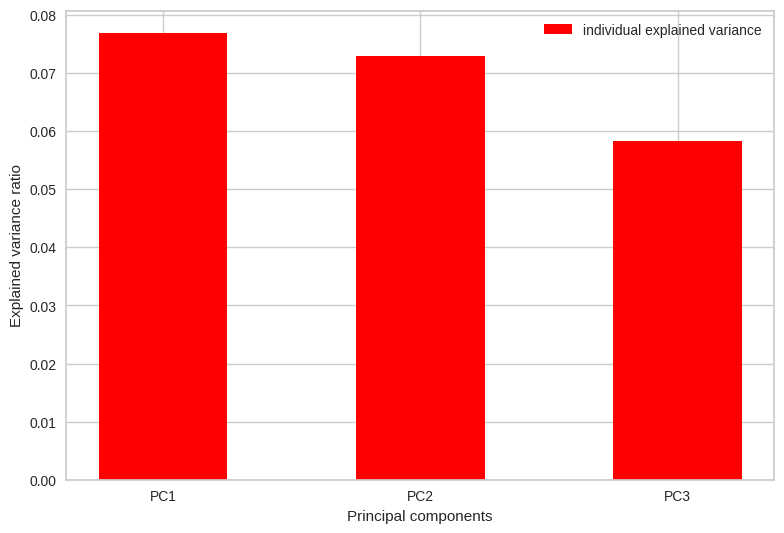

In [193]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

3. Use any clustering algorithm to create clusters

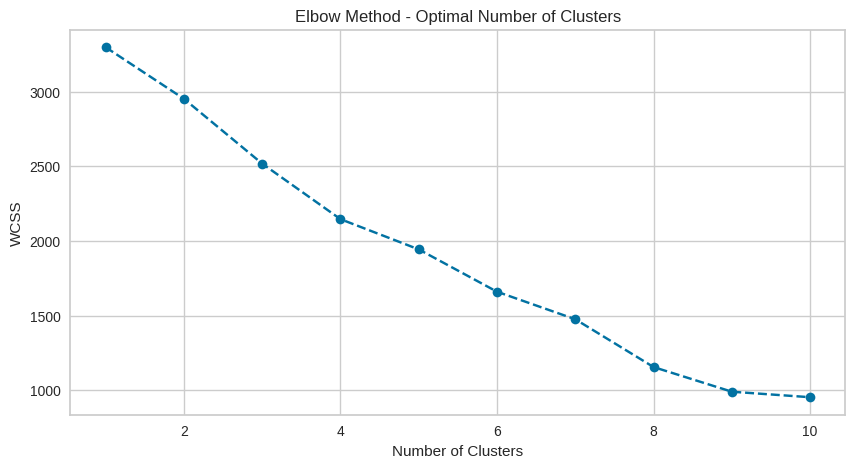

Explained variance of PC1 0.15196941493255192
Explained variance of PC2 0.10926007597671297
Explained variance of PC3 0.09945562805499483


In [194]:
pca = PCA(n_components=10, random_state=42)
pca.fit(genre_matrix)
reduced_data = pca.transform(genre_matrix)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

In [195]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(PCA_ds)

KMeans(n_clusters=3, random_state=42)

In [196]:
from sklearn.metrics import silhouette_score

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

df['cluster'] = kmeans.fit_predict(PCA_ds)

silhouette_avg = silhouette_score(PCA_ds, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5118681094808547


4. Profile each cluster that you have generated based on your experiments


Cluster Profiles:

==================== Cluster 0 ====================

         type title             director country         date_added  \
count    3087  3087                 3087    3087               3087   
unique      1  3087                 2464     438                968   
top     Movie  7:19  Cathy Garcia-Molina   India  December 31, 2019   
freq     3087     1                   13     722                 57   
mean      NaN   NaN                  NaN     NaN                NaN   
std       NaN   NaN                  NaN     NaN                NaN   
min       NaN   NaN                  NaN     NaN                NaN   
25%       NaN   NaN                  NaN     NaN                NaN   
50%       NaN   NaN                  NaN     NaN                NaN   
75%       NaN   NaN                  NaN     NaN                NaN   
max       NaN   NaN                  NaN     NaN                NaN   

        release_year rating duration                     listed_in  \
coun

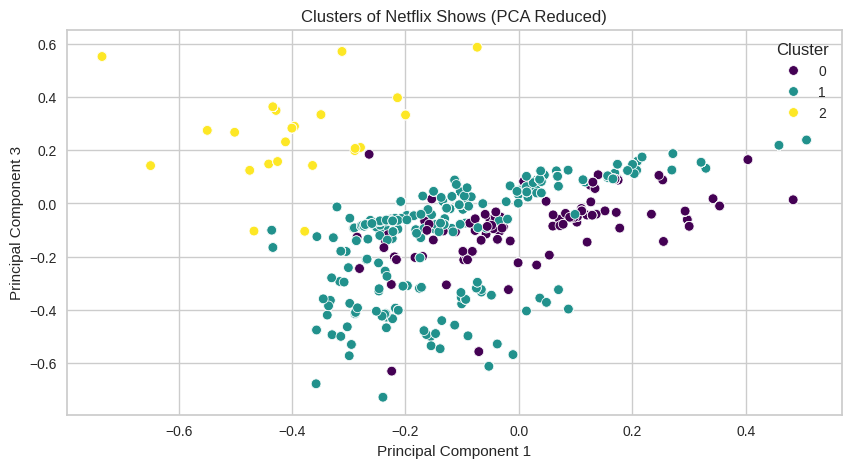

In [200]:
print("\nCluster Profiles:")

for cluster_id in range(optimal_k):
    print(f"\n{'=' * 20} Cluster {cluster_id} {'=' * 20}\n")
    cluster_data = df[df['cluster'] == cluster_id]
    profile = cluster_data.describe(include='all')
    print(profile)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of Netflix Shows (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()